In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from pathlib import Path

root_dir = str(Path.cwd().parent.parent)

# Precisão

In [8]:
def get_results_precision(filename):
    data = pd.read_csv(root_dir + "/data/backup_experimental_results/precision/" + filename, index_col=0, float_precision='high')
    data = data[['mad_len', 'std_dev_len', 'mad_az', 'std_dev_az', 'mad_el', 'std_dev_el']]
    latex_table = data.style.to_latex()
    print(latex_table)

In [9]:
get_results_precision("fixed_1.csv")

\begin{tabular}{lrrrrrr}
 & mad_len & std_dev_len & mad_az & std_dev_az & mad_el & std_dev_el \\
technique &  &  &  &  &  &  \\
music & 4.193850 & 8.608700 & 2.036548 & 8.510494 & 4.735584 & 6.555885 \\
esprit & 4.658870 & 6.458632 & 1.846517 & 6.074861 & 5.319081 & 7.122427 \\
silabs & 0.930003 & 1.178847 & 0.905716 & 1.153918 & 1.797227 & 2.266616 \\
\end{tabular}



# Hiperparâmetros

## Busca grossa-fina

In [56]:
data = pd.read_csv(root_dir + "/data/backup_experimental_results/hyperparameters/" + "fine_grid_close.csv", index_col=0, float_precision='high')
data = data[['runtime', 'rmse_len', 'rmse_len_99p']]
data['runtime'] = data['runtime'] / 1000
latex_table = data.style.to_latex()
print(latex_table)

\begin{tabular}{lrrr}
 & runtime & rmse_len & rmse_len_99p \\
coarse_step &  &  &  \\
1 & 162.101609 & 0.072007 & 0.052729 \\
2 & 49.773516 & 0.135185 & 0.052800 \\
3 & 38.124645 & 0.511820 & 0.052800 \\
4 & 83.783445 & 2.124320 & 0.052681 \\
5 & 58.926602 & 4.555282 & 0.052872 \\
6 & 79.367984 & 4.979235 & 0.053241 \\
7 & 133.385656 & 3.561207 & 0.053158 \\
8 & 202.483438 & 3.458521 & 0.053324 \\
9 & 164.320750 & 8.603865 & 0.085406 \\
\end{tabular}



## Gradiente Simples com learning rate fixo e adaptável

In [181]:
data_f = pd.read_csv(root_dir + "/data/backup_experimental_results/hyperparameters/" + "gradient_simple_close.csv", index_col=0, float_precision='high')
data_f = data_f[['learning_rate', 'runtime', 'rmse_len', 'rmse_len_99p']]
data_f['runtime'] = data_f['runtime'] / 1000
data_a = pd.read_csv(root_dir + "/data/backup_experimental_results/hyperparameters/" + "gradient_adapt_lr_close.csv", index_col=0, float_precision='high')
data_a = data_a[['learning_rate', 'runtime', 'rmse_len', 'rmse_len_99p']]
data_a['runtime'] = data_a['runtime'] / 1000

### Alfa

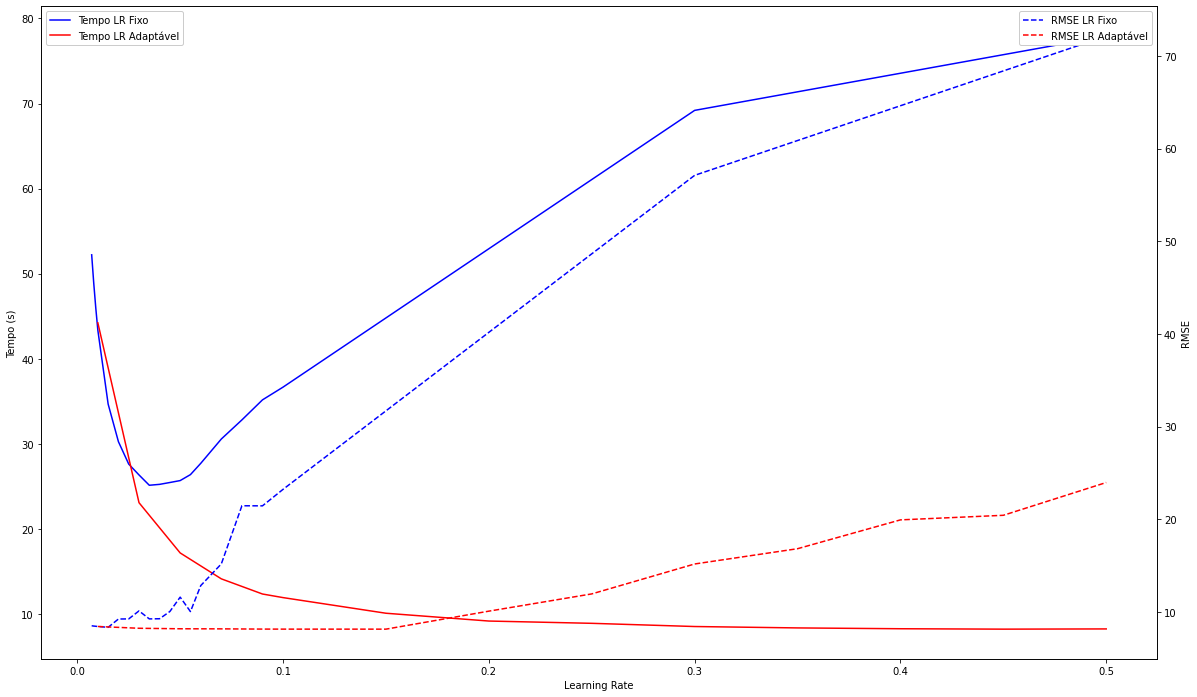

In [180]:
# Fix
data_sliced = data_f.loc[(data_f.index == 8)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo LR Fixo')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE LR Fixo')
ax2.set_ylabel('RMSE')
# Adapt
data_sliced = data_a.loc[(data_a.index == 8) & (data_a['learning_rate'] <= 0.5)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
ax1.plot(index, runtime_data, 'r-', label='Tempo LR Adaptável')
ax2.plot(index, rmse_data, 'r--', label='RMSE LR Adaptável')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_gradiente_alfa.png", bbox_inches='tight', pad_inches=0)
plt.show()

### Passo Grosso

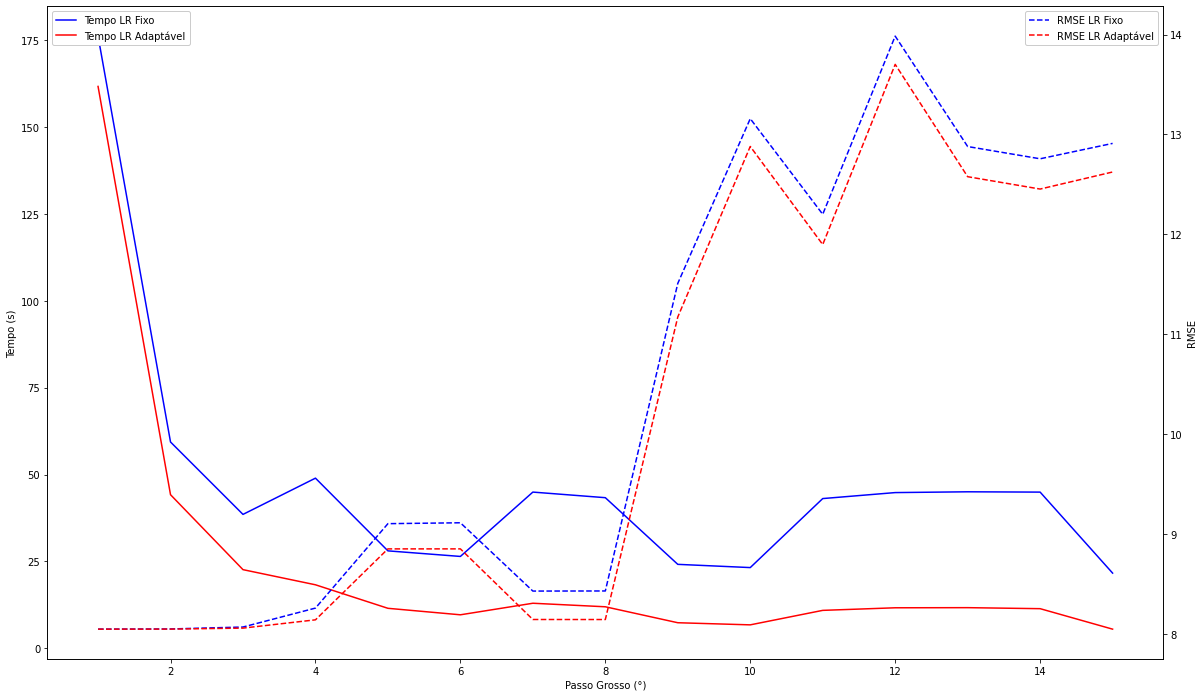

In [189]:
# Fix
data_sliced = data_f.loc[(data_f['learning_rate'] == 0.01)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced.index.values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo LR Fixo')
ax1.set_xlabel('Passo Grosso (°)')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE LR Fixo')
ax2.set_ylabel('RMSE')
# Adapt
data_sliced = data_a.loc[(data_a['learning_rate'] == 0.1) & (data_a['learning_rate'] <= 0.5)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced.index.values
ax1.plot(index, runtime_data, 'r-', label='Tempo LR Adaptável')
ax2.plot(index, rmse_data, 'r--', label='RMSE LR Adaptável')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_gradiente_pg.png", bbox_inches='tight', pad_inches=0)
plt.show()

### Melhores hiperparâmetros

#### LR Fixo

In [194]:
data_sliced = data_f.loc[(data_f['rmse_len'] < 8.3)]
data_sliced = data_sliced.sort_values(by=['runtime', 'rmse_len'])
data_sliced = data_sliced[:10]
latex_table = data_sliced.style.to_latex()
print(latex_table)

\begin{tabular}{lrrrr}
 & learning_rate & runtime & rmse_len & rmse_len_99p \\
coarse_step &  &  &  &  \\
3 & 0.025000 & 31.386475 & 8.079213 & 0.285414 \\
3 & 0.035000 & 31.416260 & 8.098838 & 0.501638 \\
3 & 0.020000 & 32.170480 & 8.072885 & 0.158346 \\
3 & 0.015000 & 33.970562 & 8.070511 & 0.073468 \\
3 & 0.010000 & 38.547324 & 8.070983 & 0.056292 \\
3 & 0.009000 & 40.127672 & 8.071463 & 0.062468 \\
4 & 0.015000 & 40.555250 & 8.189000 & 0.121156 \\
3 & 0.008000 & 41.993160 & 8.071995 & 0.069356 \\
3 & 0.007000 & 44.199676 & 8.072635 & 0.075981 \\
4 & 0.010000 & 48.979930 & 8.260570 & 0.128804 \\
\end{tabular}



#### LR Adaptável

In [198]:
data_sliced = data_a.loc[(data_a['rmse_len'] < 8.3)]
data_sliced = data_sliced.sort_values(by=['runtime', 'rmse_len'])
data_sliced = data_sliced[:10]
latex_table = data_sliced.style.to_latex()
print(latex_table)

\begin{tabular}{lrrrr}
 & learning_rate & runtime & rmse_len & rmse_len_99p \\
coarse_step &  &  &  &  \\
8 & 0.150000 & 10.117520 & 8.143386 & 0.029548 \\
7 & 0.150000 & 11.062872 & 8.143444 & 0.029832 \\
8 & 0.100000 & 11.954135 & 8.146055 & 0.029435 \\
8 & 0.090000 & 12.376561 & 8.150295 & 0.029582 \\
7 & 0.100000 & 12.971271 & 8.146411 & 0.030004 \\
7 & 0.090000 & 13.489080 & 8.150268 & 0.030454 \\
8 & 0.070000 & 14.157739 & 8.174544 & 0.030028 \\
7 & 0.070000 & 15.254417 & 8.175189 & 0.030487 \\
4 & 0.200000 & 15.842355 & 8.210128 & 0.029367 \\
4 & 0.150000 & 16.634713 & 8.141885 & 0.029520 \\
\end{tabular}



## Momentum e Nesterov

In [145]:
data_m = pd.read_csv(root_dir + "/data/backup_experimental_results/hyperparameters/" + "gradient_momentum_close.csv", index_col=0, float_precision='high')
data_m = data_m[['learning_rate', 'momentum', 'runtime', 'rmse_len', 'rmse_len_99p']]
data_m = data_m.loc[(data_m['learning_rate'] >= 0.01)]
data_m['runtime'] = data_m['runtime'] / 1000
data_n = pd.read_csv(root_dir + "/data/backup_experimental_results/hyperparameters/" + "gradient_nesterov_close.csv", index_col=0, float_precision='high')
data_n = data_n[['learning_rate', 'momentum', 'runtime', 'rmse_len', 'rmse_len_99p']]
data_n = data_n.loc[(data_n['learning_rate'] >= 0.01)]
data_n['runtime'] = data_n['runtime'] / 1000

### Beta

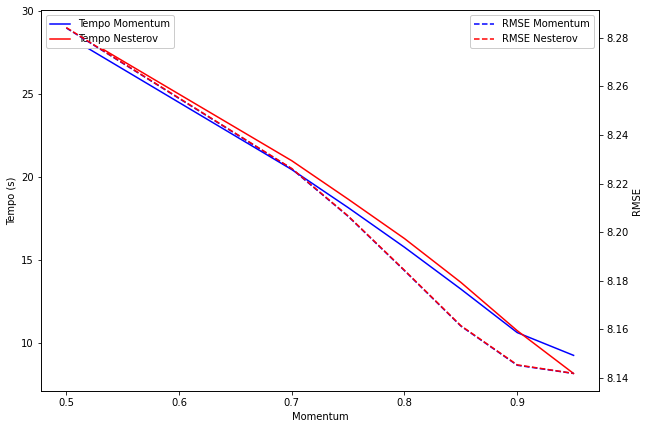

In [146]:
# Momentum
data_sliced = data_m.loc[(data_m.index == 8) & (data_m['learning_rate'] == 0.01)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['momentum'].values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo Momentum')
ax1.set_xlabel('Momentum')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE Momentum')
ax2.set_ylabel('RMSE')
# Nesterov
data_sliced = data_n.loc[(data_n.index == 8) & (data_n['learning_rate'] == 0.01)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['momentum'].values
ax1.plot(index, runtime_data, 'r-', label='Tempo Nesterov')
ax2.plot(index, rmse_data, 'r--', label='RMSE Nesterov')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_momentum_beta_01.png", bbox_inches='tight', pad_inches=0)
plt.show()

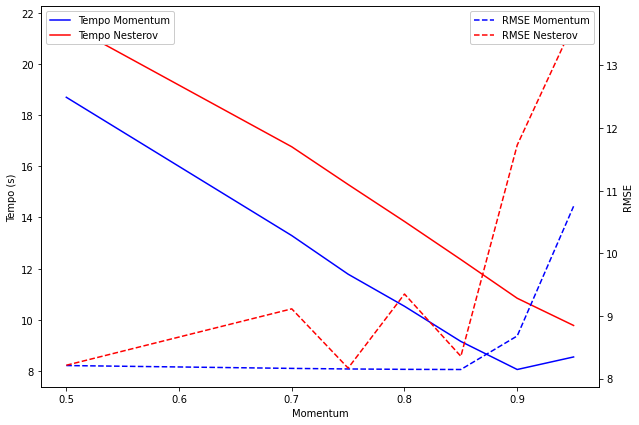

In [147]:
# Momentum
data_sliced = data_m.loc[(data_m.index == 8) & (data_m['learning_rate'] == 0.02)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['momentum'].values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo Momentum')
ax1.set_xlabel('Momentum')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE Momentum')
ax2.set_ylabel('RMSE')
# Nesterov
data_sliced = data_n.loc[(data_n.index == 8) & (data_n['learning_rate'] == 0.02)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['momentum'].values
ax1.plot(index, runtime_data, 'r-', label='Tempo Nesterov')
ax2.plot(index, rmse_data, 'r--', label='RMSE Nesterov')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_momentum_beta_02.png", bbox_inches='tight', pad_inches=0)
plt.show()

### Alfa

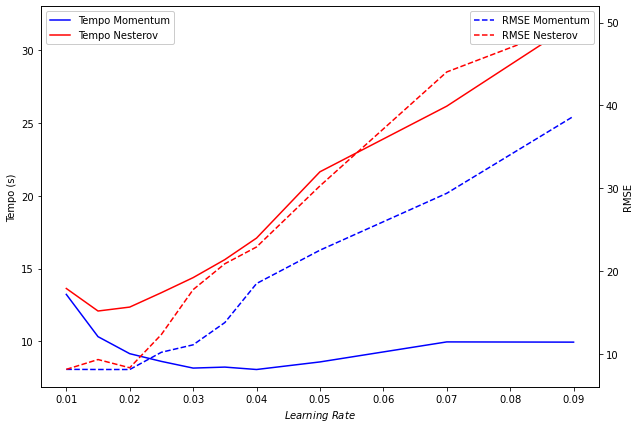

In [157]:
# Momentum
data_sliced = data_m.loc[(data_m.index == 8) & (data_m['momentum'] == 0.85)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo Momentum')
ax1.set_xlabel('$\it{Learning\ Rate}$')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE Momentum')
ax2.set_ylabel('RMSE')
# Nesterov
data_sliced = data_n.loc[(data_n.index == 8) & (data_n['momentum'] == 0.85)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
ax1.plot(index, runtime_data, 'r-', label='Tempo Nesterov')
ax2.plot(index, rmse_data, 'r--', label='RMSE Nesterov')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_momentum_alfa_85.png", bbox_inches='tight', pad_inches=0)
plt.show()

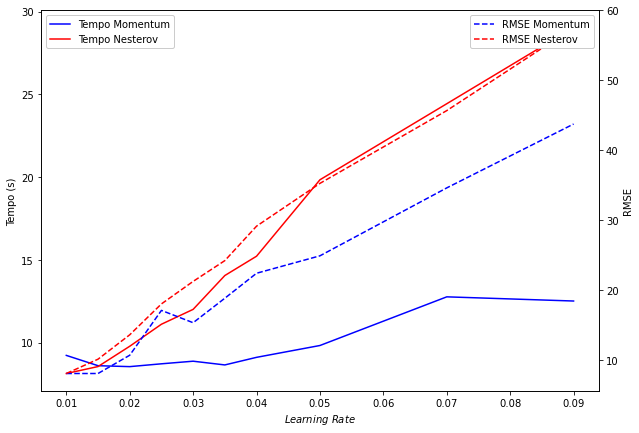

In [158]:
# Momentum
data_sliced = data_m.loc[(data_m.index == 8) & (data_m['momentum'] == 0.95)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo Momentum')
ax1.set_xlabel('$\it{Learning\ Rate}$')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE Momentum')
ax2.set_ylabel('RMSE')
# Nesterov
data_sliced = data_n.loc[(data_n.index == 8) & (data_n['momentum'] == 0.95)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced['learning_rate'].values
ax1.plot(index, runtime_data, 'r-', label='Tempo Nesterov')
ax2.plot(index, rmse_data, 'r--', label='RMSE Nesterov')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_momentum_alfa_95.png", bbox_inches='tight', pad_inches=0)
plt.show()

### Passo Grosso

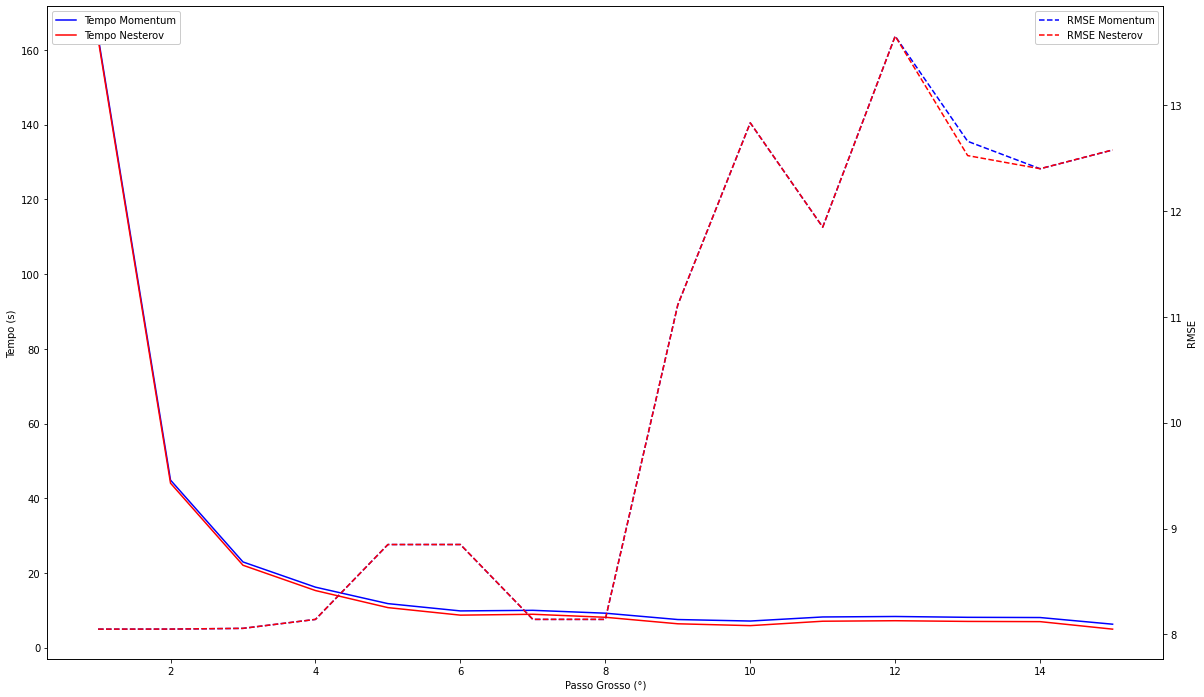

In [184]:
# Momentum
data_sliced = data_m.loc[(data_m['learning_rate'] == 0.01) & (data_m['momentum'] == 0.95)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced.index.values
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes()
ax1.plot(index, runtime_data, 'b-', label='Tempo Momentum')
ax1.set_xlabel('Passo Grosso (°)')
ax1.set_ylabel('Tempo (s)')
ax2 = ax1.twinx()
ax2.plot(index, rmse_data, 'b--', label='RMSE Momentum')
ax2.set_ylabel('RMSE')
# Nesterov
data_sliced = data_n.loc[(data_m['learning_rate'] == 0.01) & (data_n['momentum'] == 0.95)]
runtime_data = data_sliced['runtime'].values
rmse_data = data_sliced['rmse_len'].values
index = data_sliced.index.values
ax1.plot(index, runtime_data, 'r-', label='Tempo Nesterov')
ax2.plot(index, rmse_data, 'r--', label='RMSE Nesterov')
ax1.legend(loc='upper left', framealpha=1)
ax2.legend(loc='upper right', framealpha=1)
plt.savefig("hp_momentum_pg.png", bbox_inches='tight', pad_inches=0)
plt.show()

### Melhores hiperparâmetros

#### Momentum

In [164]:
data_sliced = data_m.loc[(data_m['rmse_len'] < 8.3)]
data_sliced = data_sliced.sort_values(by=['runtime', 'rmse_len'])
data_sliced = data_sliced[:10]
latex_table = data_sliced.style.to_latex()
print(latex_table)


\begin{tabular}{lrrrrr}
 & learning_rate & momentum & runtime & rmse_len & rmse_len_99p \\
coarse_step &  &  &  &  &  \\
8 & 0.015000 & 0.950000 & 8.604119 & 8.142070 & 0.030114 \\
8 & 0.015000 & 0.900000 & 8.751655 & 8.141995 & 0.029330 \\
8 & 0.020000 & 0.850000 & 9.153826 & 8.143750 & 0.029918 \\
8 & 0.010000 & 0.950000 & 9.226494 & 8.141820 & 0.029567 \\
7 & 0.010000 & 0.950000 & 9.992013 & 8.141876 & 0.029565 \\
8 & 0.015000 & 0.850000 & 10.322616 & 8.145238 & 0.029134 \\
8 & 0.020000 & 0.800000 & 10.528127 & 8.146308 & 0.029887 \\
8 & 0.010000 & 0.900000 & 10.602283 & 8.145213 & 0.029078 \\
7 & 0.015000 & 0.850000 & 11.466324 & 8.145700 & 0.029636 \\
7 & 0.010000 & 0.900000 & 11.587038 & 8.145380 & 0.029212 \\
\end{tabular}



#### Nesterov

In [165]:
data_sliced = data_n.loc[(data_n['rmse_len'] < 8.3)]
data_sliced = data_sliced.sort_values(by=['runtime', 'rmse_len'])
data_sliced = data_sliced[:10]
latex_table = data_sliced.style.to_latex()
print(latex_table)

\begin{tabular}{lrrrrr}
 & learning_rate & momentum & runtime & rmse_len & rmse_len_99p \\
coarse_step &  &  &  &  &  \\
8 & 0.010000 & 0.950000 & 8.132425 & 8.141865 & 0.031048 \\
7 & 0.010000 & 0.950000 & 8.936735 & 8.141917 & 0.031277 \\
8 & 0.010000 & 0.900000 & 10.716698 & 8.145374 & 0.030807 \\
7 & 0.010000 & 0.900000 & 11.709722 & 8.145540 & 0.031952 \\
8 & 0.010000 & 0.850000 & 13.632009 & 8.161500 & 0.033201 \\
8 & 0.015000 & 0.800000 & 14.133788 & 8.156374 & 0.077121 \\
7 & 0.010000 & 0.850000 & 14.653218 & 8.161846 & 0.037342 \\
7 & 0.015000 & 0.800000 & 15.129309 & 8.156514 & 0.085058 \\
8 & 0.020000 & 0.750000 & 15.286466 & 8.166388 & 0.151984 \\
4 & 0.010000 & 0.950000 & 15.288927 & 8.141815 & 0.031260 \\
\end{tabular}

